In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture
import plotly.subplots as sp

In [2]:
plt.style.use('seaborn-v0_8')

pio.templates.default = 'seaborn'

### Charging Stations Data

In [3]:
charging_df = pd.read_excel('charging_data.xlsx')

In [4]:
charging_df.head()

,State/ UTs,No. of charging stations
0,Maharashtra,660
1,Andhra Pradesh,222
2,Tamil Nadu,441
3,Gujarat,195
4,Uttar Pradesh,406


In [5]:
charging_df.describe()

,No. of charging stations
count,34.000000
mean,193.705882
std,344.290534
min,1.000000
25%,16.500000
50%,54.000000
75%,215.250000
max,1845.000000


In [6]:
charging_df['percent'] = charging_df['No. of charging stations']/charging_df['No. of charging stations'].sum()*100

In [7]:
charging_df.sort_values(by='percent', ascending=False).head()

,State/ UTs,No. of charging stations,percent
11,Delhi,1845,28.013969
6,Karnataka,704,10.689341
0,Maharashtra,660,10.021257
2,Tamil Nadu,441,6.696022
4,Uttar Pradesh,406,6.164592


Around 50% of the charging stations in India are located only in Delhi, Karnataka and Maharashtra.

In [8]:
fig = px.bar(charging_df, x='State/ UTs', y='No. of charging stations',title='Location wise Charging stations in India', template='plotly_dark')
fig.update_traces(texttemplate='%{y}')
fig.update_layout(
    xaxis_tickangle=-45,
    title_x=0.5,
    title_font=dict(family="Arial, sans-serif",size=24, color='white')
)
fig.show()

### Behaviour Data

In [9]:
df = pd.read_csv('Indian automoble buying behavour study 1.0.csv')

In [10]:
print(df.shape)
df.head()

(99, 13)


,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [12]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [13]:
df.isnull().sum()/len(df)*100

Age                 0.0
Profession          0.0
Marrital Status     0.0
Education           0.0
No of Dependents    0.0
Personal loan       0.0
House Loan          0.0
Wife Working        0.0
Salary              0.0
Wife Salary         0.0
Total Salary        0.0
Make                0.0
Price               0.0
dtype: float64

In [14]:
for col in df.columns:
    if df[col].dtype=='object':
        print(f"{col}: {df[col].unique()}")

Profession: ['Salaried' 'Business']
Marrital Status: ['Single' 'Married']
Education: ['Post Graduate' 'Graduate']
Personal loan: ['Yes' 'No']
House Loan: ['No' 'Yes']
Wife Working: ['No' 'Yes' 'm']
Make: ['i20' 'Ciaz' 'Duster' 'City' 'SUV' 'Baleno' 'Verna' 'Luxuray' 'Creata']


In [15]:
df['Wife Working'] = df['Wife Working'].replace('m','No')

### Distributions of Numerical Features

In [16]:
def draw_distribution(feature):
    # Density curve using seaborn
    density = sns.kdeplot(df[feature], bw_adjust=0.5)
    x_vals = density.get_lines()[0].get_xdata()
    y_vals = density.get_lines()[0].get_ydata()
    plt.close()

    fig_age = px.histogram(df, x=feature, nbins=25, marginal='box',
                        title=f"{feature} Distribution",
                        color_discrete_sequence=['#1f77b4'],
                        template='plotly_dark')
    fig_age.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals * len(df) * np.diff(np.histogram(df[feature], bins=25)[1])[0],
        mode='lines', line=dict(color='orange'), name='Density Curve'))

    fig_age.update_layout(
        title_x=0.5,
        xaxis_title=feature,
        yaxis_title='Count',
        title_font=dict(family="Arial, sans-serif", size=24, color="white"),
        bargap=0.1
    )
    fig_age.show()

In [17]:
for feature in ['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price']:
    draw_distribution(feature)

### Categorical Features Distributions

In [18]:
def draw_cat_distribution(feature):
    counts = df[feature].value_counts()
    trace1 = go.Bar(
        x=counts.index,
        y=counts.values,
        marker=dict(color=px.colors.qualitative.Bold),
        name=feature,
        text=counts.values
    )
    trace2 = go.Pie(
        labels=counts.index,
        values=counts.values,
        marker=dict(colors=px.colors.qualitative.Bold),
        name=feature,
        textinfo='label+percent'
    )

    fig = make_subplots(rows=1, cols=2, subplot_titles=('Bar Chart', 'Pie Chart'), specs=[[{'type': 'xy'}, {'type': 'domain'}]])

    fig.add_trace(trace1,row=1,col=1)
    fig.add_trace(trace2,row=1,col=2)

    fig.update_layout(
        title_text=f"{feature} Distribution",
        title_x=0.5,
        title_font=dict(family="Arial, sans-serif", size=24, color="white"),
        xaxis_title=feature,
        yaxis_title='Count',
        paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)',
        template='plotly_dark'
    )
    fig.show()

In [19]:
df.rename(columns={'Make':'Vehicle Make'}, inplace=True)

In [20]:
for feature in ['Profession', 'Marrital Status', 'Education',
       'Personal loan', 'House Loan', 'Wife Working', 'Vehicle Make', 'No of Dependents']:
    draw_cat_distribution(feature)

In [21]:
fig = px.box(df, 
             x='House Loan', 
             y='Total Salary', 
             title='Total Salary vs. House Loan',
             template='plotly_dark')
fig.update_layout(
    title_x=0.5,
    title_font=dict(family="Arial, sans-serif", size=24, color="white")
)
fig.show()

In [22]:
fig = px.box(df, 
             x='Personal loan', 
             y='Total Salary', 
             title='Total Salary vs. Personal Loan',
             template='plotly_dark')
fig.update_layout(
    title_x=0.5,
    title_font=dict(family="Arial, sans-serif", size=24, color="white")
)
fig.show()

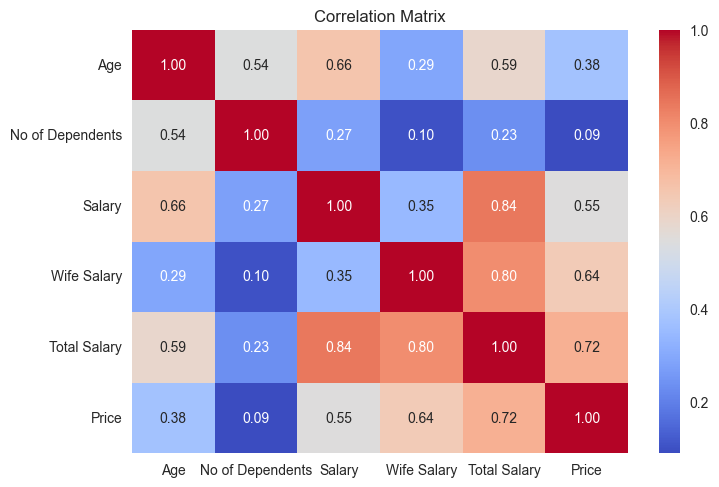

In [23]:
numeric = [col for col in df.columns if df[col].dtype!='object']

sns.heatmap(df[numeric].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [24]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Vehicle Make', 'Price'],
      dtype='object')

In [25]:
categorical_columns = ['Profession', 'Marrital Status', 'Education', 'Personal loan', 'House Loan', 'Wife Working', 'Vehicle Make']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [26]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Vehicle Make,Price
0,27,1,1,1,0,1,0,0,800000,0,800000,8,800000
1,35,1,0,1,2,1,1,1,1400000,600000,2000000,1,1000000
2,45,0,0,0,4,1,1,0,1800000,0,1800000,4,1200000
3,41,0,0,1,3,0,0,1,1600000,600000,2200000,2,1200000
4,31,1,0,1,2,1,0,1,1800000,800000,2600000,6,1600000


In [27]:
df.describe()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Vehicle Make,Price
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,99.000000,9.900000e+01
mean,36.313131,0.646465,0.151515,0.565657,2.181818,0.323232,0.373737,0.525253,1.736364e+06,5.343434e+05,2.270707e+06,3.535354,1.194040e+06
std,6.246054,0.480500,0.360375,0.498193,1.335265,0.470091,0.486257,0.501903,6.736217e+05,6.054450e+05,1.050777e+06,2.767571,4.376955e+05
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,0.000000,1.100000e+05
25%,31.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.300000e+06,0.000000e+00,1.550000e+06,1.000000,8.000000e+05
50%,36.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.600000e+06,5.000000e+05,2.100000e+06,3.000000,1.200000e+06
75%,41.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.200000e+06,9.000000e+05,2.700000e+06,6.000000,1.500000e+06
max,51.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.800000e+06,2.100000e+06,5.200000e+06,8.000000,3.000000e+06


In [28]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [29]:
# AIC and BIC values for different number of clusters

bic_scores = []
aic_scores = []
k_range = range(2, 6)

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))
    aic_scores.append(gmm.aic(df_scaled))

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(k_range), y=bic_scores, mode='lines+markers', name='BIC Score',
                         line=dict(color='blue'), marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=list(k_range), y=aic_scores, mode='lines+markers', name='AIC Score',
                         line=dict(color='orange'), marker=dict(color='orange')))
fig.update_layout(
    title='AIC and BIC Scores for Different Number of Clusters',
    xaxis_title='Number of clusters',
    yaxis_title='Score',
    template='plotly_dark',
    title_x=0.5,
    title_font=dict(family="Arial, sans-serif", size=24, color="white")
)

fig.show()

From the above plot optimal number of clusters should be 3 

In [30]:
optimal_k = 3
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
df['Cluster'] = gmm.fit_predict(df_scaled)

In [31]:
cluster_centers = scaler.inverse_transform(gmm.means_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=df.columns[:-1])
print(cluster_centers_df)

         Age  Profession  Marrital Status  Education  No of Dependents  \
0  28.470058    0.588262     8.825787e-01   0.646967          0.235354   
1  37.019662    0.700013     8.326673e-17   0.560019          2.319902   
2  39.374483    0.593708     0.000000e+00   0.531283          2.999790   

   Personal loan    House Loan  Wife Working        Salary   Wife Salary  \
0       0.294193 -5.551115e-17  1.175533e-01  1.229430e+06  4.697142e+04   
1       0.219991  3.799840e-01  1.000000e+00  1.789963e+06  1.041990e+06   
2       0.499965  5.624606e-01 -3.330669e-16  1.921838e+06 -3.492460e-10   

   Total Salary  Vehicle Make         Price  
0  1.276401e+06      3.411631  9.889184e+05  
1  2.831952e+06      4.080126  1.397946e+06  
2  1.921838e+06      2.749877  9.843831e+05  


In [32]:
print(df['Cluster'].value_counts())

Cluster
1    50
2    32
0    17
Name: count, dtype: int64


### Segment Profile Plot

In [33]:
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_props = cluster_sizes / len(df)
means = df.groupby('Cluster')[df.columns[:-1]].mean()

fig = sp.make_subplots(rows=5, cols=3, 
                        subplot_titles=df.columns[:-1]
                       )

colors = px.colors.qualitative.Plotly 
for idx, feature in enumerate(df.columns[:-1]):
    feature_data = means[feature]
    
    fig.add_trace(go.Bar(
        y=[f'Cluster {i+1}' for i in range(3)],
        x=feature_data,
        orientation='h',
        marker=dict(color=colors[:3]),
        text=np.round(feature_data,2),
    ), row=(idx // 3 + 1), col=(idx % 3 + 1))
    
fig.update_layout(
    title_text=f'Segment Profile Plot for the GMM Clustering',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    height=800,
    showlegend=False
)
fig.show()

### Box Plots

In [34]:
fig = sp.make_subplots(rows=5, cols=3, 
                       subplot_titles=df.columns[:-1])

for idx, feature in enumerate(df.columns[:-1]):
    row = idx // 3 + 1
    col = idx % 3 + 1
    
    for cluster_num in range(3):
        cluster_data = df[df['Cluster'] == cluster_num][feature]
        
        fig.add_trace(go.Box(
            y=cluster_data,
            name=f'Cluster {cluster_num + 1}',
            boxmean='sd',
            marker=dict(color=px.colors.qualitative.Plotly[cluster_num]),
        ), row=row, col=col)
    
    fig.update_yaxes(title_text=feature, row=row, col=col)

fig.update_layout(
    title_text='Box Plots of Features by Cluster',
    title_x=0.5,
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    height=1300,
    showlegend=False
)
fig.show()

### Pair Plot

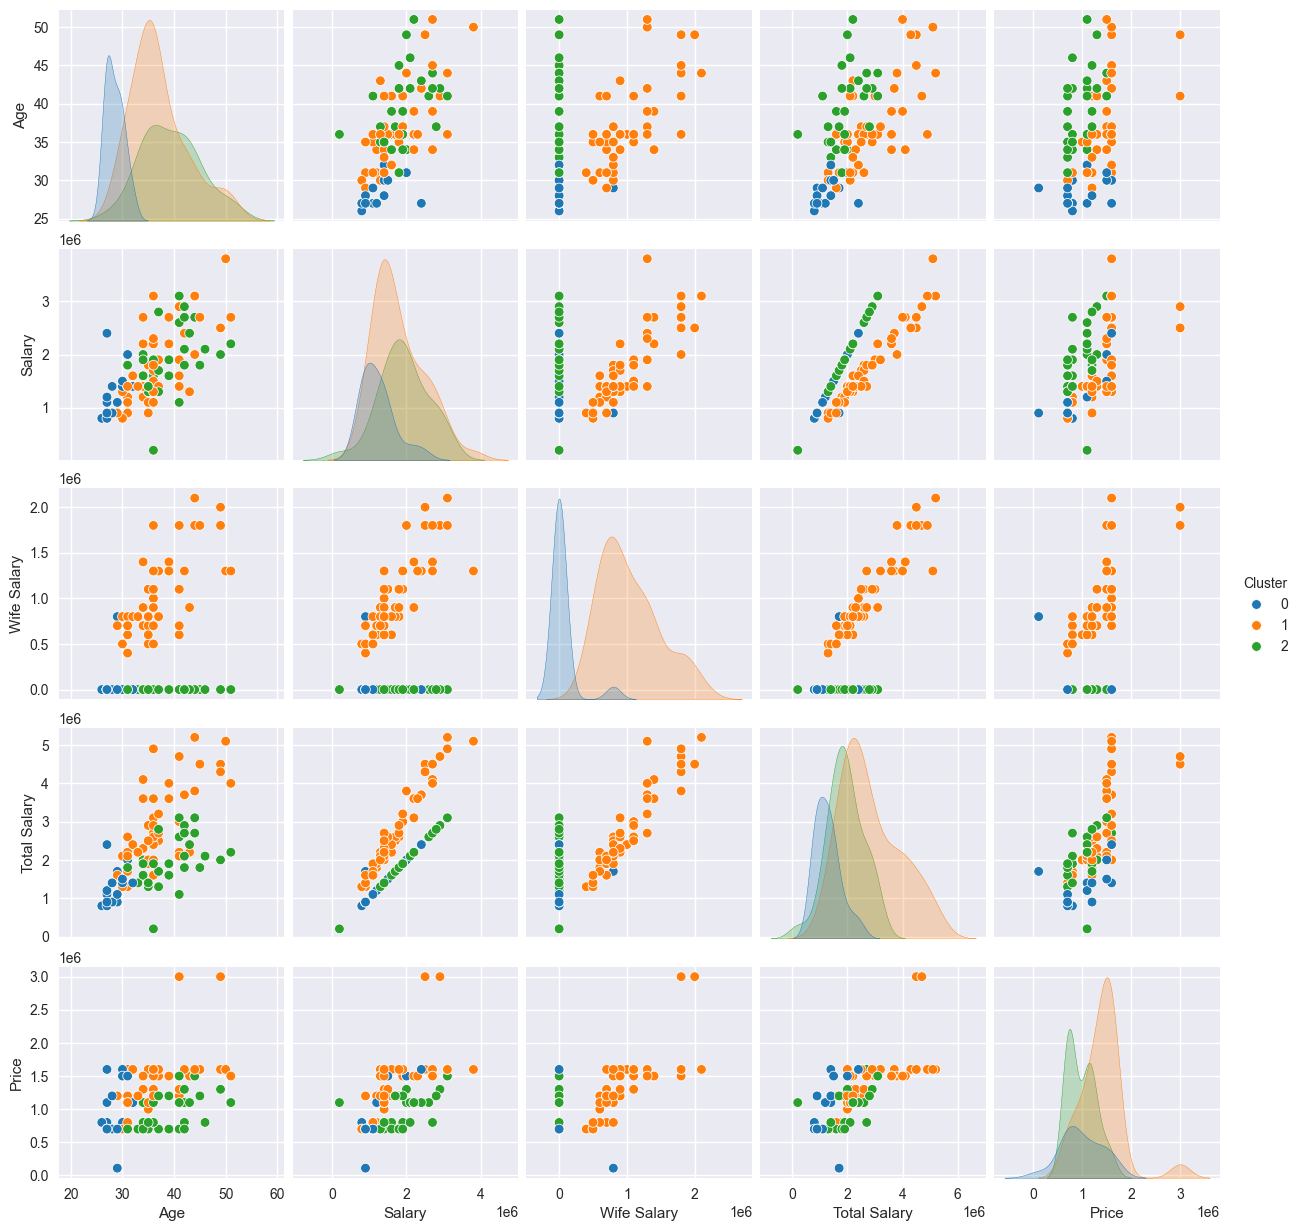

In [35]:
features = ['Age', 'Salary', 'Wife Salary', 'Total Salary', 'Price', 'Cluster']

sns.pairplot(df[features], hue='Cluster', palette='tab10')
plt.show()